# Feature analysis

In [21]:
from SimpleCV import *
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
import sklearn 

df = pd.read_csv("../dataset-numpy/dataset_features.csv")
# delete first column. this is index
df.head()

,Unnamed: 0,matrix_top_row,matrix_second_row,matrix_third_row,matrix_bottom_row,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,label
0,1919,2,2,2,2,424.0,15.424528,15.757469,90,30,20,1,1,1,1,0
1,1267,2,1,0,2,447.5,15.733333,16.043575,90,30,21,1,1,1,1,0
2,173,2,2,2,2,455.0,16.009158,15.209890,90,30,19,1,1,0,1,0
3,542,2,2,0,2,438.5,15.229571,16.378563,90,30,20,1,1,0,1,0
4,541,2,2,0,2,462.5,15.646126,16.255135,90,30,20,1,1,1,0,0


In [16]:
df.describe()

,Unnamed: 0,matrix_top_row,matrix_second_row,matrix_third_row,matrix_bottom_row,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,959.500000,1.843750,1.613021,1.588021,1.844271,291.653385,15.859298,15.380416,50.857330,29.997917,20.457292,0.377083,0.295312,0.211458,0.348958,4.532813
std,554.400577,0.493377,0.558918,0.586954,0.604153,67.428881,1.193617,1.869070,65.489537,0.064533,2.035446,0.574330,0.456302,0.408449,0.476765,2.868122
min,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,11.835737,10.582800,-87.878899,28.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,479.750000,2.000000,1.000000,1.000000,1.000000,244.000000,15.077516,14.116460,65.718203,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,959.500000,2.000000,2.000000,2.000000,2.000000,275.500000,15.797984,15.295089,85.236358,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1439.250000,2.000000,2.000000,2.000000,2.000000,326.000000,16.571982,16.354908,90.000000,30.000000,22.000000,1.000000,1.000000,0.000000,1.000000,7.000000
max,1919.000000,3.000000,3.000000,3.000000,3.000000,512.000000,20.410788,20.841542,90.000000,30.000000,30.000000,2.000000,1.000000,1.000000,1.000000,9.000000


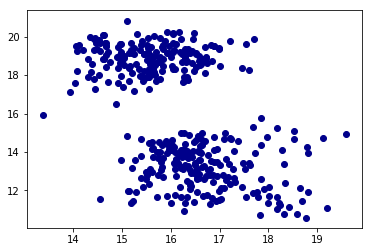

In [3]:
#check if x and y centroids are apart
centroid = df[(df.label == 6) | (df.label == 9)]
xCentroid = centroid['blob_centroid_x']
yCentroid = centroid['blob_centroid_y']
plt.scatter(x= xCentroid, y= yCentroid, c='DarkBlue')

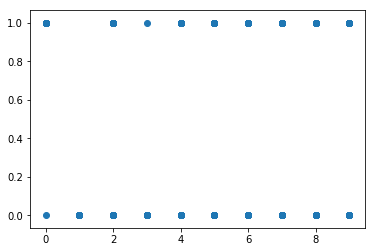

In [13]:
plt.scatter(x= df.label, y= df.centroid_is_empty)

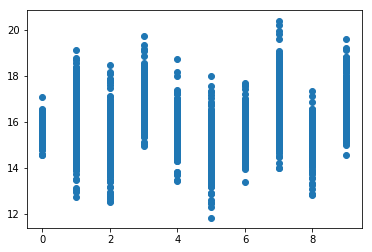

In [14]:
plt.scatter(x=df.label, y= df.blob_centroid_x)

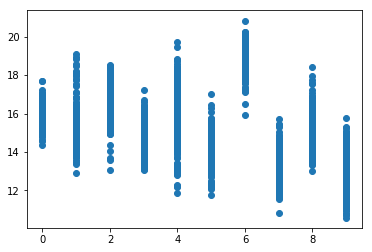

In [15]:
plt.scatter(x=df.label, y= df.blob_centroid_y)

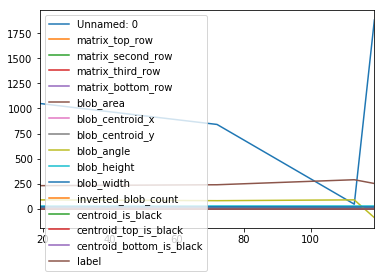

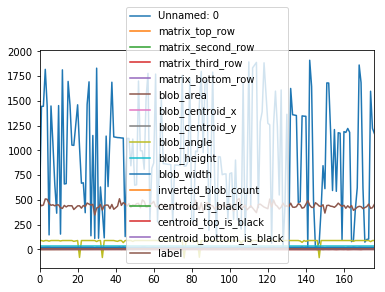

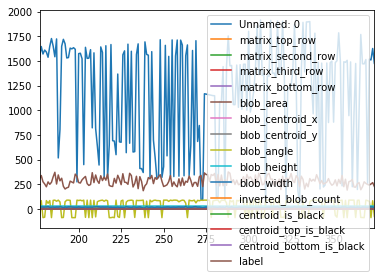

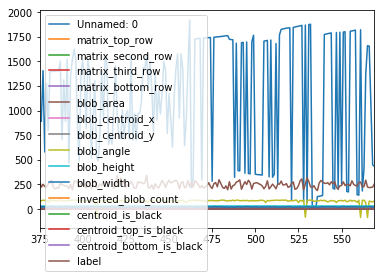

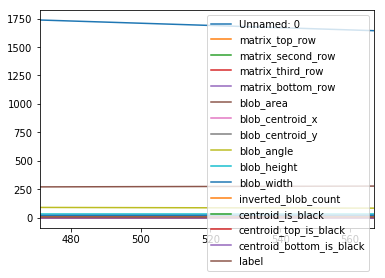

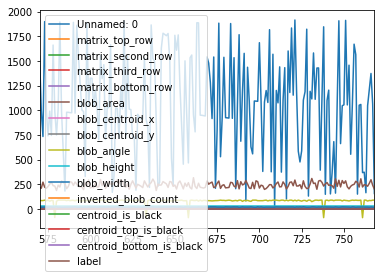

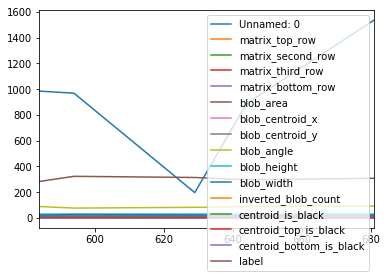

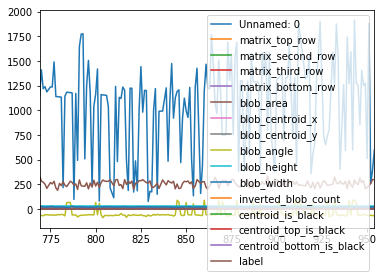

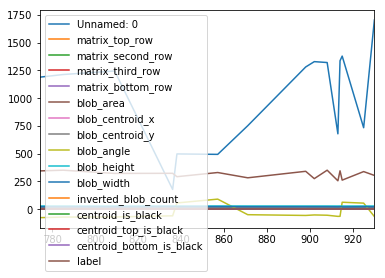

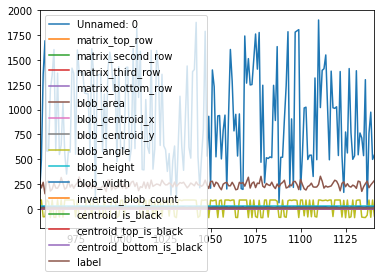

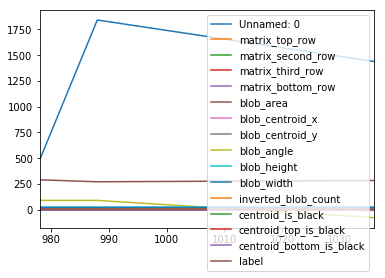

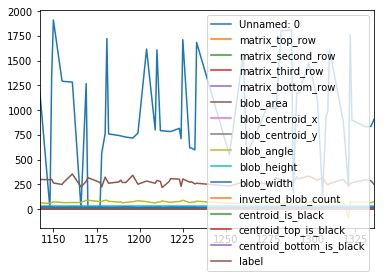

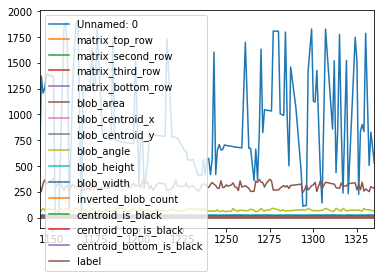

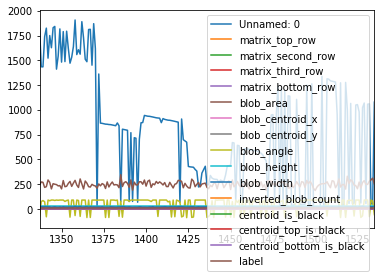

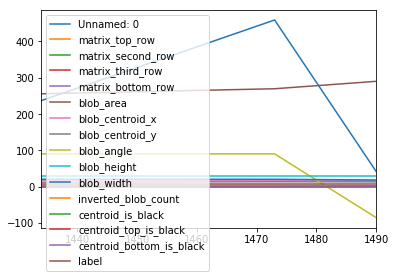

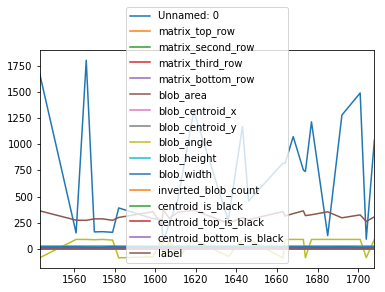

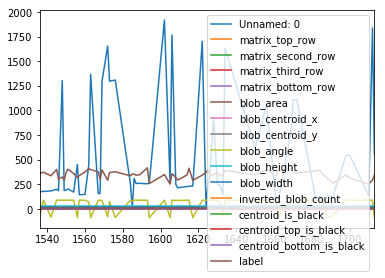

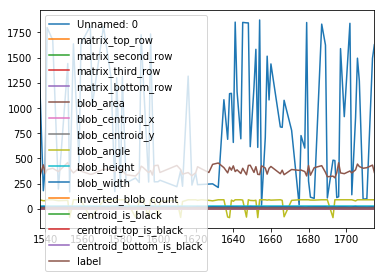

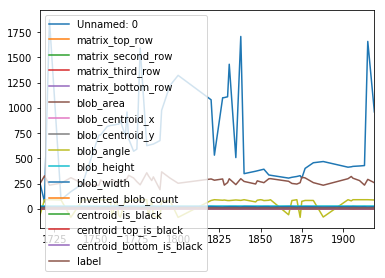

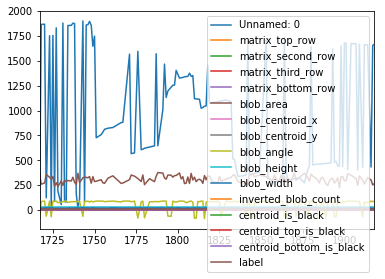

In [7]:
#digit, amount of holes, counter
df1 = df.groupby(['label', 'inverted_blob_count']).plot()
# df1.head()
# df1 = df.filter(items=['label', 'inverted_blob_count'])


# df1.groupby(['label', 'inverted_blob_count']).head()
# DataFrame({'count' : df1.groupby( ['label', 'inverted_blob_count']).size()}).reset_index()
# xCentroid = df['inverted_blob_count']
# yCentroid = df1.count()
# plt.scatter(x= xCentroid, y= xCentroid, c='DarkBlue')

# preprocessing